#PROBLEM STATEMENT
Understanding the factors that influence student performance in mathematics is essential for improving educational outcomes. This dataset contains information on students’ demographics, parental education, lunch type, and test preparation, which may play a significant role in determining their math scores.

#OBJECTIVE
To develop a regression model that accurately predicts a student’s math score using features such as gender, race/ethnicity, parental level of education, lunch type, and test preparation course.

#Importing basic libraries

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [51]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Reading the CSV file

In [52]:
df=pd.read_csv(r"C:\Users\ayush\OneDrive\Desktop\student.csv")

In [53]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Performing Feature Engineering

In [54]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [55]:
num_features=X.select_dtypes(exclude=object).columns
cat_features=X.select_dtypes(include=object).columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor= ColumnTransformer(
   [  
       ("OneHotEncoder",oh_transformer,cat_features),
       ("StandardScaler",numeric_transformer,num_features)
       
   ]

)


In [56]:
X=preprocessor.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

Creating an Evaluate Function to give all metrics after model Training

In [58]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square= r2_score(true ,predicted)
    return mae,rmse,r2_square

In [ ]:
models={
  "Linear Regression":LinearRegression(),
  "Lasso":Lasso(),
  "Ridge":Ridge(),
  "K-Neighbors Regressor":KNeighborsRegressor(),
  "Decision Tree":DecisionTreeRegressor(),
  "Random Forrest Regressor":RandomForestRegressor(),
  "AdaBoost Regressor":AdaBoostRegressor(),
  "CatBoosting Regressor":CatBoostRegressor(),
  "XgBoost Regressor":XGBRegressor()}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)#train model

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)


    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)

    print("Model performance for training set")
    print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print("----------------------------------")

    print("Model performance for test set")
    print("-Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2))
    print('='*35)
    print('\n')







Linear Regression
Model performance for training set
-Root Mean Squared Error: 5.3274
-Mean Absolute Error: 4.2788
-R2 Score: 0.8741
----------------------------------
Model performance for test set
-Root Mean Squared Error: 5.4096
-Mean Absolute Error: 4.2259
-R2 Score: 0.8797


Lasso
Model performance for training set
-Root Mean Squared Error: 6.5938
-Mean Absolute Error: 5.2063
-R2 Score: 0.8071
----------------------------------
Model performance for test set
-Root Mean Squared Error: 6.5197
-Mean Absolute Error: 5.1579
-R2 Score: 0.8253


Ridge
Model performance for training set
-Root Mean Squared Error: 5.3233
-Mean Absolute Error: 4.2650
-R2 Score: 0.8743
----------------------------------
Model performance for test set
-Root Mean Squared Error: 5.3904
-Mean Absolute Error: 4.2111
-R2 Score: 0.8806


K-Neighbors Regressor
Model performance for training set
-Root Mean Squared Error: 5.7122
-Mean Absolute Error: 4.5187
-R2 Score: 0.8553
----------------------------------
Model per

Results 

In [64]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2 score']).sort_values(by=['R2 score'],ascending=False)

,Model name,R2 score
2,Ridge,0.880593
0,Linear Regression,0.879740
6,AdaBoost Regressor,0.860793
5,Random Forrest Regressor,0.853901
7,CatBoosting Regressor,0.851632
8,XgBoost Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.731218


In [65]:
print(model_list)
print(r2_list)

['Linear Regression', 'Lasso', 'Ridge', 'K-Neighbors Regressor', 'Decision Tree', 'Random Forrest Regressor', 'AdaBoost Regressor', 'CatBoosting Regressor', 'XgBoost Regressor']
[0.8797402769404664, 0.8253197323627852, 0.8805931485028738, 0.7838976503502941, 0.7312179253253905, 0.8539014046100227, 0.8607930274927458, 0.8516318920747058, 0.8277965653186071]


Linear Regression

In [66]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("the accuracy of the model is %.2f"%score)

the accuracy of the model is 87.97


Text(0, 0.5, 'predicted')

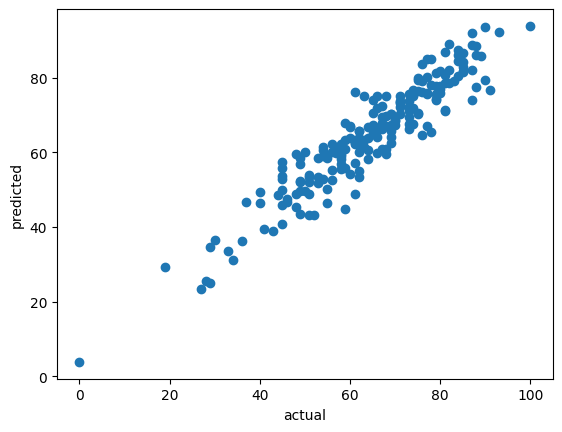

In [67]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")


Difference between Actaul value and Predicted value

In [70]:
pred_df=pd.DataFrame({"Actual Value":y_test,"Predicted value":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual Value,Predicted value,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
